In [2]:
from PIL import Image
import pandas as pd
import numpy as np
import plotly.express as px


In [3]:
from transformers import CLIPFeatureExtractor, CLIPProcessor, CLIPModel

In [4]:
import torch
import requests
from IPython.display import display

In [5]:
# load pretrained clip model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [6]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [8]:
processor

CLIPProcessor:
- image_processor: CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

- tokenizer: CLIPTokenizerFast(name_or_path='openai/clip-vit-base-patch32', vocab_size=49408, model_max_length=77, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, spec

In [9]:
# Load processor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

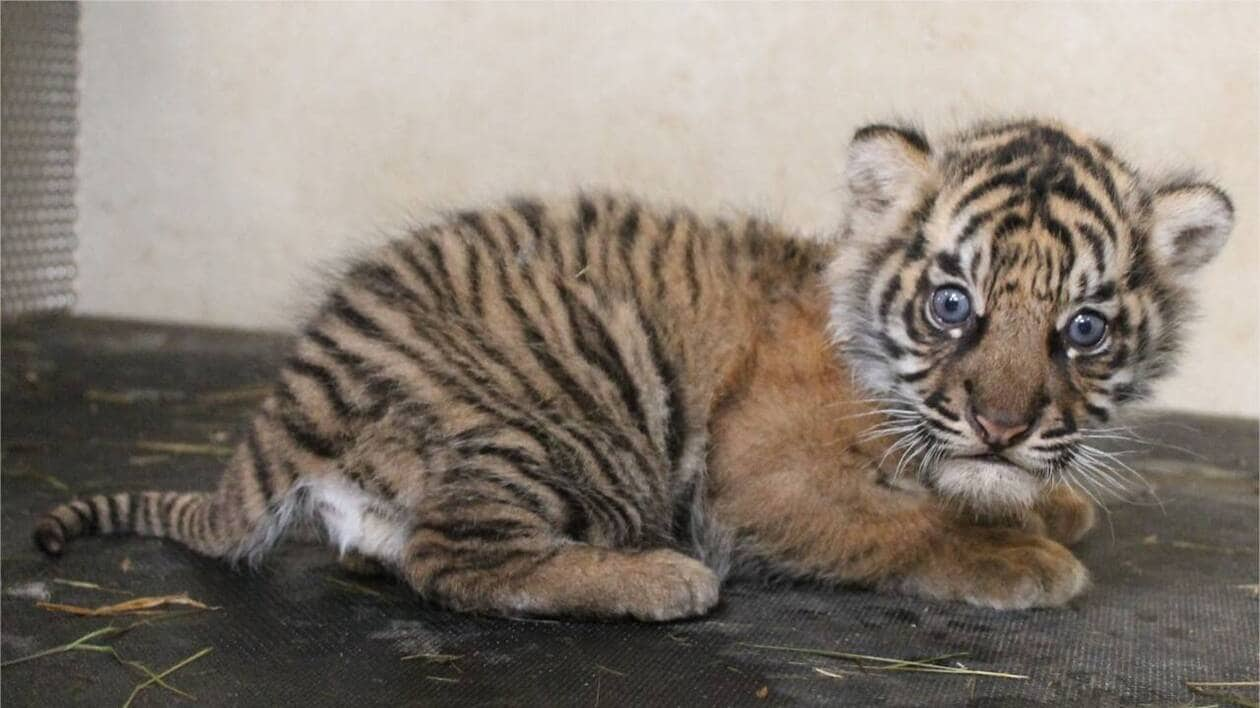

In [51]:
# This section is for loading the image
url = "http://images.cocodataset.org/val2017/000000039769.jpg" # Example image URL, you can replace it with your image URL
url = 'https://media.ouest-france.fr/v1/pictures/MjAyMjExNTZhMGI2YjQyYmJiNzg4MTcyNmJhNGY4NDAwZDcyNTE?width=1260&height=708&focuspoint=81%2C38&cropresize=1&client_id=bpeditorial&sign=575f17200f3bb594666f4e4c13dceae458b52a8a8aacdc464e453151a05b743b'
image = Image.open(requests.get(url, stream=True).raw) # Load image from the URL

# Display the image
display(image)

In [52]:
# Define the list of target labels/categories
text = ["cat", "dog", "rabbit", 'elephant', 'football', 'tigre', 'man']

In [53]:
# Preprocess the text and image using the CLIP processor
# return_tensors="pt" specifies to return PyTorch tensors
# padding=True ensures inputs are padded to the same length
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)


In [54]:
# Unpack the inputs
input_ids = inputs.input_ids  # Tokenized and encoded text input IDs
# Print information about the unpacked inputs
print("Input IDs (shape):", input_ids.shape)
print(input_ids)

Input IDs (shape): torch.Size([7, 4])
tensor([[49406,  2368, 49407, 49407],
        [49406,  1929, 49407, 49407],
        [49406, 10274, 49407, 49407],
        [49406, 10299, 49407, 49407],
        [49406,  1882, 49407, 49407],
        [49406,   555, 17878, 49407],
        [49406,   786, 49407, 49407]])


In [55]:
attention_mask = inputs.attention_mask # Mask indicating which tokens are valid (1) vs. padding (0)
print("Attention Mask (shape):", attention_mask.shape)
print(attention_mask)

Attention Mask (shape): torch.Size([7, 4])
tensor([[1, 1, 1, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 1],
        [1, 1, 1, 0]])


In [56]:
pixel_values = inputs.pixel_values # Processed image pixel values
print("Pixel Values (shape):", pixel_values.shape)
print(pixel_values)


Pixel Values (shape): torch.Size([1, 3, 224, 224])
tensor([[[[ 1.4048,  1.4048,  1.3610,  ...,  1.5508,  1.5508,  1.5362],
          [ 1.4048,  1.3902,  1.3026,  ...,  1.5070,  1.5070,  1.5070],
          [ 1.3902,  1.3756,  1.3610,  ...,  1.5216,  1.5216,  1.5362],
          ...,
          [-1.0039, -1.0185, -1.0915,  ..., -1.0185, -1.0769, -1.0039],
          [-1.0039, -1.0185, -1.0477,  ..., -1.1207, -1.0039, -1.0039],
          [-0.9456, -0.9748, -0.9893,  ..., -1.1645, -0.9602, -1.0039]],

         [[ 1.3995,  1.3995,  1.3545,  ...,  1.5346,  1.5346,  1.5196],
          [ 1.3995,  1.3845,  1.2945,  ...,  1.4896,  1.4896,  1.4896],
          [ 1.3845,  1.3695,  1.3545,  ...,  1.5046,  1.5046,  1.5196],
          ...,
          [-0.9417, -0.9717, -1.0467,  ..., -0.9867, -1.0317, -0.9567],
          [-0.9567, -0.9717, -1.0017,  ..., -1.1068, -0.9567, -0.9567],
          [-0.8816, -0.9117, -0.9417,  ..., -1.1518, -0.9117, -0.9567]],

         [[ 1.3780,  1.3780,  1.3354,  ...,  1.4918

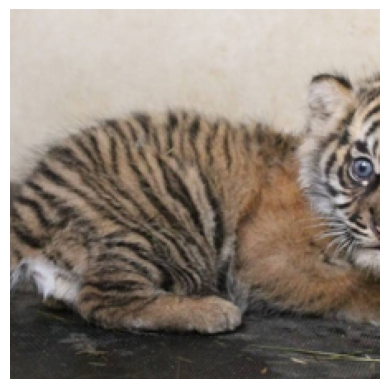

In [57]:
import torch
import matplotlib.pyplot as plt

# take the first image in the batch
img_tensor = pixel_values[0]

# tensor is in (C, H, W), so we permute to (H, W, C)
img = img_tensor.permute(1, 2, 0).detach().cpu().numpy()

# pixel_values are usually normalized (e.g. mean/std of ImageNet)
# if you used CLIPProcessor or similar, undo the normalization:
# CLIP expects images normalized to mean=(0.481, 0.457, 0.408) and std=(0.268, 0.261, 0.275)
mean = [0.48145466, 0.4578275, 0.40821073]
std  = [0.26862954, 0.26130258, 0.27577711]

img = img * std + mean  # unnormalize
img = img.clip(0, 1)    # keep values in [0,1]

# show the image
plt.imshow(img)
plt.axis("off")
plt.show()


In [58]:
with torch.no_grad():
    outputs = model(**inputs) # Pass the inputs to the model

In [59]:
print(outputs.text_embeds.shape)
print(outputs.image_embeds.shape)

torch.Size([7, 512])
torch.Size([1, 512])


In [60]:
embeds = outputs.image_embeds[0].detach().cpu().numpy()
#embeds

In [61]:
import plotly.express as px

# take the first embedding
embeds = outputs.image_embeds[0].detach().cpu().numpy()

# scatter plot: x = dimension index, y = value
fig = px.scatter(x=list(range(len(embeds))), y=embeds,
                 title="Scatter Plot of Image Embedding",
                 labels={"x":"Embedding Dimension", "y":"Value"})
fig.show()


In [62]:
from sklearn.decomposition import PCA

In [63]:
embeds.shape

(512,)

In [64]:
logits_per_image = outputs.logits_per_image # Extract the image-text similarity scores
print("Logits Per Image (shape):", logits_per_image.shape) #The higher the score, the more similar the image is to that label.
print(logits_per_image)

# τ   (temperature multiplier)
temperature = model.logit_scale.exp().item()
print(f"Cosine similarity is scaled by: {temperature:.3f}")

Logits Per Image (shape): torch.Size([1, 7])
tensor([[25.7287, 21.7456, 20.4423, 20.5377, 19.8562, 27.1734, 22.1892]])
Cosine similarity is scaled by: 100.000


In [65]:
probs = logits_per_image.softmax(dim=-1) # Apply softmax to get probabilities for each label
probs

tensor([[1.8863e-01, 3.5137e-03, 9.5445e-04, 1.0500e-03, 5.3111e-04, 7.9985e-01,
         5.4751e-03]])

In [66]:
text

['cat', 'dog', 'rabbit', 'elephant', 'football', 'tigre', 'man']

In [67]:
# Print the probabilities for each class
for i, label in enumerate(text): # Loop through the labels and their indices
  print(f"Probability of {label}: {probs[0][i].item()}") # Print the probability for each label

# Get the predicted label
predicted_label = text[probs.argmax()] # Get the label with the highest probability
print(f"\nPredicted Label: {predicted_label}") # Print the predicted label

Probability of cat: 0.18863025307655334
Probability of dog: 0.0035136567894369364
Probability of rabbit: 0.000954445858951658
Probability of elephant: 0.0010499844793230295
Probability of football: 0.0005311146378517151
Probability of tigre: 0.7998453974723816
Probability of man: 0.005475104320794344

Predicted Label: tigre
